# **TESLA "TSLA" Stock Exploratory Data Analysis**

In [24]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import scipy.stats as stats
from datetime import datetime
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.tools as tls

In [25]:
start_date = datetime(2017,1,1)
end_date = datetime.today()

stock= yf.download('TSLA', start_date , end_date)
stock.reset_index(inplace = True)
stock['Company'] = 'TSLA'

[*********************100%%**********************]  1 of 1 completed


In [26]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,TSLA
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,TSLA
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,TSLA
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,TSLA
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,TSLA
...,...,...,...,...,...,...,...,...
1697,2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400,TSLA
1698,2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300,TSLA
1699,2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600,TSLA
1700,2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200,TSLA


In [27]:
NIO = yf.download('NIO',start_date ,end_date)
NIO.reset_index(inplace=True)
NIO['Company'] = 'NIO'

LI = yf.download('LI',start_date ,end_date)
LI.reset_index(inplace=True)
LI['Company'] = 'LI'

RIVN = yf.download('RIVN',start_date ,end_date)
RIVN.reset_index(inplace=True)
RIVN['Company'] = 'RIVN'

GM = yf.download('GM',start_date ,end_date)
GM.reset_index(inplace=True)
GM['Company'] = 'GM'

TM = yf.download('TM',start_date ,end_date)
TM.reset_index(inplace=True)
TM['Company'] = 'TM'

F = yf.download('F',start_date ,end_date)
F.reset_index(inplace=True)
F['Company'] = 'F'

RACE = yf.download('RACE',start_date ,end_date)
RACE.reset_index(inplace=True)
RACE['Company'] = 'RACE'

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
'''1. concat'''
# Concatenate all the stock dataframes into one
all_stocks = pd.concat([stock, NIO, LI, RIVN, GM, TM, F, RACE], axis=0)
all_stocks.reset_index(drop=True, inplace=True)

In [29]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,TSLA
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,TSLA
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,TSLA
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,TSLA
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,TSLA
...,...,...,...,...,...,...,...,...
11063,2023-10-02,295.760010,297.480011,295.005005,296.589996,296.589996,248100,RACE
11064,2023-10-03,295.559998,297.238007,293.489990,294.549988,294.549988,234400,RACE
11065,2023-10-04,295.829987,299.589996,294.420013,299.589996,299.589996,162000,RACE
11066,2023-10-05,300.450012,301.200012,297.075012,299.950012,299.950012,226800,RACE


In [30]:
# Calculate additional features
all_stocks['MA_10'] = all_stocks['Adj Close'].rolling(10).mean()
all_stocks['MA_20'] = all_stocks['Adj Close'].rolling(20).mean()
all_stocks['MA_60'] = all_stocks['Adj Close'].rolling(60).mean()

all_stocks['Daily Return'] = all_stocks['Adj Close'].pct_change()

In [31]:
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Company,MA_10,MA_20,MA_60,Daily Return
0,2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,TSLA,NaN,NaN,NaN,NaN
1,2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,TSLA,NaN,NaN,NaN,0.046085
2,2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,TSLA,NaN,NaN,NaN,-0.001057
3,2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,TSLA,NaN,NaN,NaN,0.009967
4,2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,TSLA,NaN,NaN,NaN,0.009912
...,...,...,...,...,...,...,...,...,...,...,...,...
11063,2023-10-02,295.760010,297.480011,295.005005,296.589996,296.589996,248100,RACE,292.986996,296.834499,309.657167,0.003553
11064,2023-10-03,295.559998,297.238007,293.489990,294.549988,294.549988,234400,RACE,292.530997,296.303497,309.261500,-0.006878
11065,2023-10-04,295.829987,299.589996,294.420013,299.589996,299.589996,162000,RACE,292.198996,296.157497,308.948166,0.017111
11066,2023-10-05,300.450012,301.200012,297.075012,299.950012,299.950012,226800,RACE,293.036996,296.215497,308.569333,0.001202


In [32]:
all_stocks = all_stocks[all_stocks['MA_10'].notna()]
all_stocks = all_stocks[all_stocks['MA_20'].notna()]
all_stocks = all_stocks[all_stocks['MA_60'].notna()]
all_stocks = all_stocks[all_stocks['Daily Return'].notna()]

In [33]:
stock_list = ['TSLA', 'NIO', 'LI', 'RIVN', 'GM', 'TM', 'F', 'RACE']
stock_list

['TSLA', 'NIO', 'LI', 'RIVN', 'GM', 'TM', 'F', 'RACE']

In [34]:
# Stock Prices Plot using seaborn
"""plt.figure(figsize=(25, 10))
sns.lineplot(data=all_stocks, x='Date', y='Adj Close', hue='Company')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Stock Prices')"""
import plotly.express as px
fig = px.line(all_stocks, x='Date', y='Adj Close', color='Company')
fig.show()

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA_Final = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_Final.reset_index(drop=True, inplace=True)
TSLA_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[0,0])
axes[0,0].set_title('Tesla, Inc.')

TM_Final = all_stocks[all_stocks['Company'] == 'TM']
TM_Final.reset_index(drop=True, inplace=True)
TM_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[0,1])
axes[0,1].set_title('Toyota Motor Corp.')

GM_Final = all_stocks[all_stocks['Company'] == 'GM']
GM_Final.reset_index(drop=True, inplace=True)
GM_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[1,0])
axes[1,0].set_title('General Motors Company')

RACE_Final = all_stocks[all_stocks['Company'] == 'RACE']
RACE_Final.reset_index(drop=True, inplace=True)
RACE_Final[['Adj Close', 'MA_10', 'MA_20', 'MA_60']].plot(ax=axes[1,1])
axes[1,1].set_title('Ferrari N.V. Common Shares')

#fig.tight_layout()
fig_plotly=tls.mpl_to_plotly(fig)
fig_plotly.show()

In [36]:
# To plot the daily return percentage
'''plt.figure(figsize=(20, 20))

for i, company in enumerate(stock_list, 1):
    company_data = all_stocks[all_stocks['Company'] == company]

    plt.subplot(4, 2, i)
    sns.distplot(company_data['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(company)'''

import plotly.express as px
for i, company in enumerate(stock_list, 1):
    company_data = all_stocks[all_stocks['Company'] == company]
    fig = px.histogram(company_data, x='Daily Return', color='Company')
    fig.update_layout(title='Histogram of Daily Returns')
    fig.show()
    
    

In [37]:
TSLA_Data = all_stocks[all_stocks['Company'] == 'TSLA']
TSLA_ADJ_Close = TSLA_Data['Adj Close']

# Fit the KDE to the TSLA data
kde = stats.gaussian_kde(TSLA_ADJ_Close)
x = np.linspace(TSLA_ADJ_Close.min(), TSLA_ADJ_Close.max(), 100)
y = kde(x)

# Plot the KDE
'''plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Adj Close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation - TSLA Stocks')
plt.show()
'''
fig = px.line(TSLA_Data, x=x, y=y, title='Kernel Density Estimation - TSLA Stocks')
fig.show()


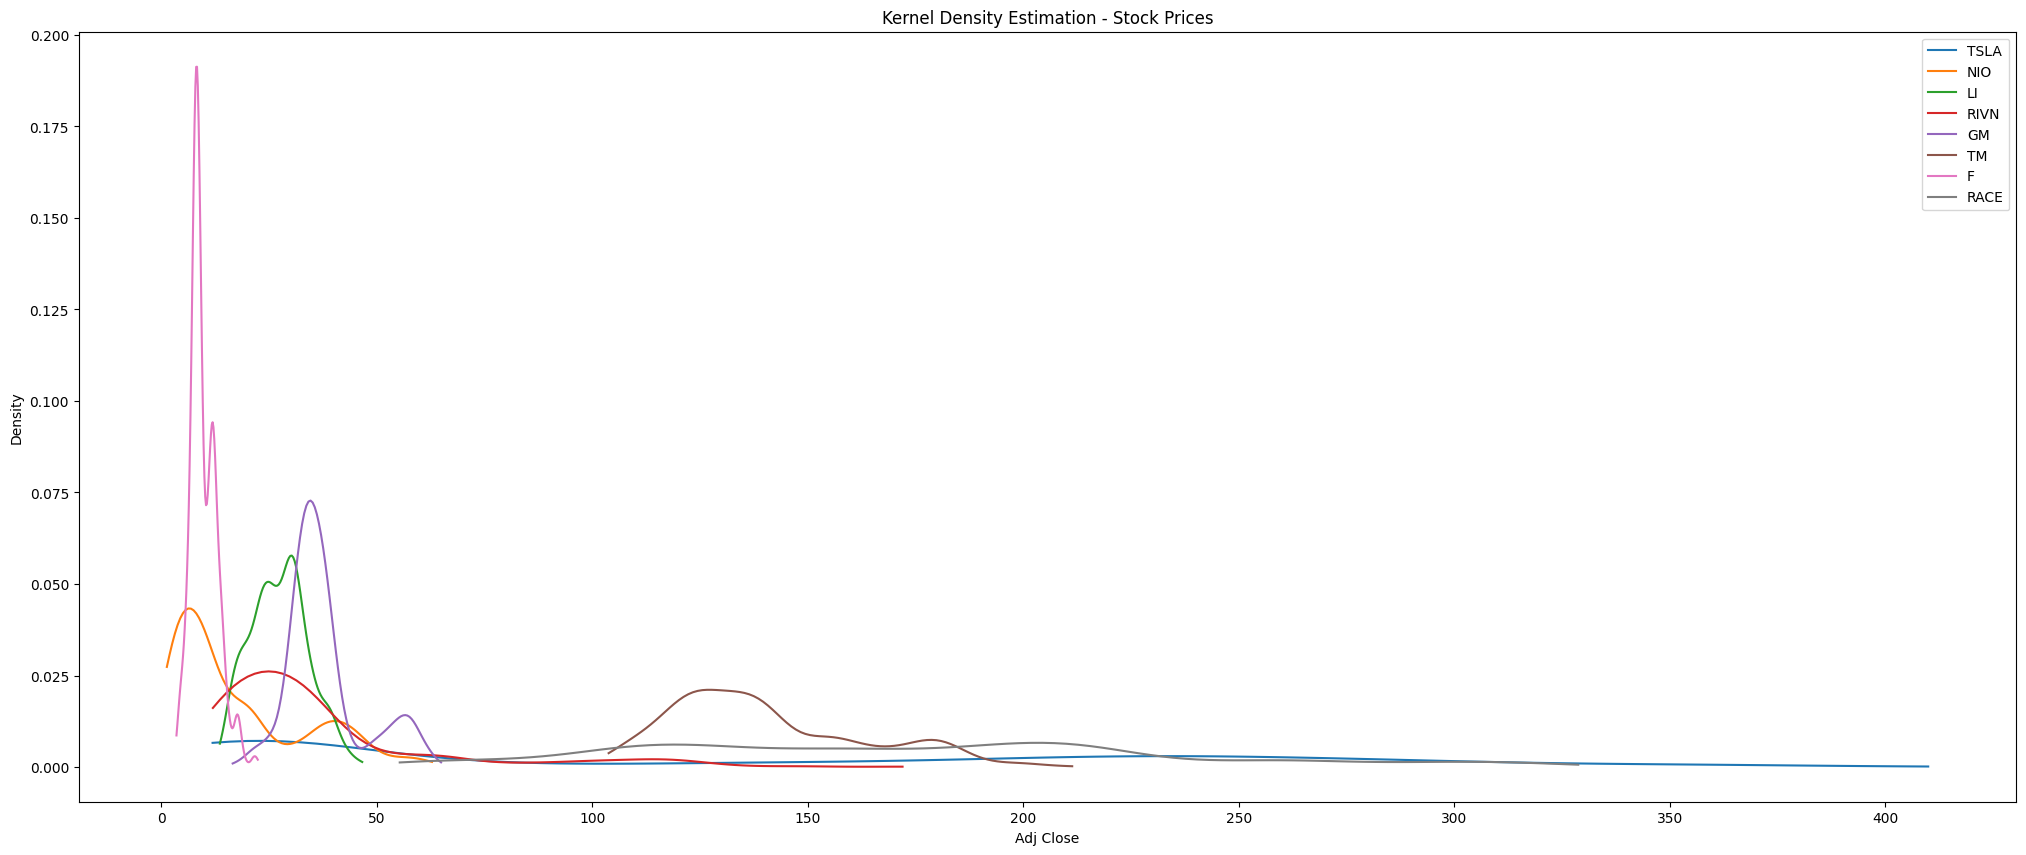

In [38]:
plt.figure(figsize=(25, 10))

for stock in stock_list:
    stock_data = all_stocks[all_stocks['Company'] == stock]
    adj_close = stock_data['Adj Close']
    kde = stats.gaussian_kde(adj_close)
    x = np.linspace(adj_close.min(), adj_close.max(), 100)
    y = kde(x)
    plt.plot(x, y, label=stock)

plt.xlabel('Adj Close')
plt.ylabel('Density')
plt.title('Kernel Density Estimation - Stock Prices')
plt.legend()
plt.show()

In [39]:
import plotly.graph_objects as go
figs=[]
for stock in stock_list:
    stock_data = all_stocks[all_stocks['Company'] == stock]
    adj_close = stock_data['Adj Close'].values
            
    kde = stats.gaussian_kde(adj_close)  
    x = np.linspace(min(adj_close), max(adj_close), 100)
    y = kde(x)
            
    fig = px.line(x=x, y=y, labels={'x':'Adj Close', 'y':'Density'}, title=stock)
    figs.append(fig)

fig = go.Figure(data=figs)
fig.update_layout(title='KDE of Stock Prices', xaxis_title='Adj Close', yaxis_title='Density')
fig.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 11.93133259,  15.9519252 ,  19.97251781,  23.99311043,  28.01370304,
                           32.03429565,  36.05488826,  40.07548088,  44.09607349,  48.1166661 ,
                           52.13725871,  56.15785133,  60.17844394,  64.19903655,  68.21962916,
                           72.24022177,  76.26081439,  80.281407  ,  84.30199961,  88.32259222,
                           92.34318484,  96.36377745, 100.38437006, 104.40496267, 108.42555529,
                          112.4461479 , 116.46674051, 120.48733312, 124.50792574, 128.52851835,
                          132.54911096, 136.56970357, 140.59029619, 144.6108888 , 148.63148141,
                          152.65207402, 156.67266664, 160.69325925, 164.71385186, 168.73444447,
                          172.75503709, 176.7756297 , 180.79622231, 184.81681492, 188.83740754,
                          192.85800015, 196.87859276, 200.89918537, 204.91977799, 208.9403706 ,
                          212.96096321, 216.98155582, 221.00214844, 225.02274105, 229.04333366,
                          233.06392627, 237.08451889, 241.1051115 , 245.12570411, 249.14629672,
                          253.16688934, 257.18748195, 261.20807456, 265.22866717, 269.24925978,
                          273.2698524 , 277.29044501, 281.31103762, 285.33163023, 289.35222285,
                          293.37281546, 297.39340807, 301.41400068, 305.4345933 , 309.45518591,
                          313.47577852, 317.49637113, 321.51696375, 325.53755636, 329.55814897,
                          333.57874158, 337.5993342 , 341.61992681, 345.64051942, 349.66111203,
                          353.68170465, 357.70229726, 361.72288987, 365.74348248, 369.7640751 ,
                          373.78466771, 377.80526032, 381.82585293, 385.84644555, 389.86703816,
                          393.88763077, 397.90822338, 401.928816  , 405.94940861, 409.97000122]),
              'xaxis': 'x',
              'y': array([0.00661223, 0.00693864, 0.00712278, 0.00715503, 0.00703606, 0.00677655,
                          0.0063959 , 0.00592   , 0.00537845, 0.00480171, 0.0042185 , 0.0036537 ,
                          0.00312704, 0.00265252, 0.00223854, 0.00188848, 0.00160169, 0.00137452,
                          0.00120138, 0.00107564, 0.00099034, 0.00093869, 0.0009144 , 0.00091179,
                          0.00092594, 0.00095261, 0.00098822, 0.00102985, 0.00107514, 0.00112237,
                          0.00117037, 0.00121855, 0.00126691, 0.00131593, 0.00136655, 0.00141997,
                          0.00147756, 0.00154061, 0.00161025, 0.00168719, 0.00177171, 0.00186355,
                          0.00196193, 0.00206557, 0.00217279, 0.00228161, 0.00238981, 0.00249508,
                          0.00259507, 0.00268747, 0.00277013, 0.00284106, 0.00289858, 0.00294132,
                          0.00296835, 0.00297917, 0.00297377, 0.00295259, 0.00291651, 0.00286672,
                          0.00280462, 0.00273175, 0.00264963, 0.00255969, 0.00246321, 0.00236132,
                          0.00225502, 0.00214521, 0.00203281, 0.00191883, 0.00180438, 0.00169077,
                          0.00157942, 0.00147182, 0.00136947, 0.00127367, 0.00118547, 0.00110552,
                          0.001034  , 0.00097061, 0.00091458, 0.00086478, 0.00081981, 0.00077818,
                          0.00073844, 0.00069932, 0.00065983, 0.00061931, 0.0005775 , 0.00053444,
                          0.00049048, 0.00044616, 0.00040213, 0.00035908, 0.00031767, 0.00027844,
                          0.00024181, 0.00020809, 0.00017742, 0.00014985]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'TSLA'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1.32000005,  1.94141419,  2.56282834,  3.18424248,  3.80565662,
                           4.42707076,  5.04848491,  5.66989905,  6.29131319,  6.91272733,
                           7.53414148,  8.15555562,  8.77696976,  9.3983839 , 10.01979805,
                          10.64121219, 11.26262633, 11.88404047, 12.50545462, 13.12686876,
                          13.7482829 , 14.36969704, 14.99111119, 15.61252533, 16.23393947,
                          16.85535361, 17.47676776, 18.0981819 , 18.71959604, 19.34101018,
                          19.96242433, 20.58383847, 21.20525261, 21.82666675, 22.44808089,
                          23.06949504, 23.69090918, 24.31232332, 24.93373746, 25.55515161,
                          26.17656575, 26.79797989, 27.41939403, 28.04080818, 28.66222232,
                          29.28363646, 29.9050506 , 30.52646475, 31.14787889, 31.76929303,
                          32.39070717, 33.01212132, 33.63353546, 34.2549496 , 34.87636374,
                          35.49777789, 36.11919203, 36.74060617, 37.36202031, 37.98343446,
                          38.6048486 , 39.22626274, 39.84767688, 40.46909103, 41.09050517,
                          41.71191931, 42.33333345, 42.95474759, 43.57616174, 44.19757588,
                          44.81899002, 45.44040416, 46.06181831, 46.68323245, 47.30464659,
                          47.92606073, 48.54747488, 49.16888902, 49.79030316, 50.4117173 ,
                          51.03313145, 51.65454559, 52.27595973, 52.89737387, 53.51878802,
                          54.14020216, 54.7616163 , 55.38303044, 56.00444459, 56.62585873,
                          57.24727287, 57.86868701, 58.49010116, 59.1115153 , 59.73292944,
                          60.35434358, 60.97575773, 61.59717187, 62.21858601, 62.84000015]),
              'xaxis': 'x',
              'y': array([0.02735378, 0.03064935, 0.03371223, 0.03644434, 0.0387692 , 0.0406352 ,
                          0.04201554, 0.04290527, 0.04331657, 0.0432737 , 0.04280869, 0.0419587 ,
                          0.04076502, 0.03927361, 0.03753617, 0.03561108, 0.03356328, 0.03146264,
                          0.0293808 , 0.02738655, 0.02554065, 0.02389061, 0.02246637, 0.02127757,
                          0.02031296, 0.01954205, 0.018919  , 0.01838823, 0.01789115, 0.01737296,
                          0.01678887, 0.01610874, 0.01531968, 0.01442628, 0.01344873, 0.01241908,
                          0.01137645, 0.01036193, 0.00941391, 0.00856443, 0.00783699, 0.00724578,
                          0.00679627, 0.00648675, 0.00631042, 0.00625744, 0.00631675, 0.00647725,
                          0.00672832, 0.00705977, 0.00746133, 0.00792195, 0.00842917, 0.00896874,
                          0.00952458, 0.01007919, 0.0106144 , 0.01111232, 0.01155637, 0.01193219,
                          0.01222828, 0.01243633, 0.0125512 , 0.01257054, 0.01249431, 0.01232427,
                          0.01206353, 0.01171643, 0.01128855, 0.01078701, 0.01022083, 0.00960118,
                          0.00894147, 0.00825712, 0.00756492, 0.0068822 , 0.00622568, 0.00561047,
                          0.00504903, 0.00455052, 0.00412039, 0.00376031, 0.0034684 , 0.00323973,
                          0.00306684, 0.00294049, 0.00285028, 0.00278534, 0.00273493, 0.00268899,
                          0.00263862, 0.00257648, 0.00249708, 0.00239695, 0.0022747 , 0.00213096,
                          0.00196814, 0.00179013, 0.00160191, 0.00140907]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'NIO'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([13.61999989, 13.95363627, 14.28727265, 14.62090903, 14.95454541,
                          15.28818179, 15.62181817, 15.95545455, 16.28909093, 16.62272731,
                          16.95636369, 17.29000007, 17.62363645, 17.95727283, 18.29090921,
                          18.62454559, 18.95818197, 19.29181835, 19.62545473, 19.95909111,
                          20.29272749, 20.62636387, 20.96000025, 21.29363663, 21.62727301,
                          21.96090939, 22.29454577, 22.62818215, 22.96181853, 23.29545491,
                          23.62909129, 23.96272767, 24.29636405, 24.63000043, 24.96363681,
                          25.29727319, 25.63090957, 25.96454595, 26.29818233, 26.63181871,
                          26.96545509, 27.29909147, 27.63272785, 27.96636423, 28.30000061,
                          28.63363699, 28.96727338, 29.30090976, 29.63454614, 29.96818252,
                          30.3018189 , 30.63545528, 30.96909166, 31.30272804, 31.63636442,
                          31.9700008 , 32.30363718, 32.63727356, 32.97090994, 33.30454632,
                          33.6381827 , 33.97181908, 34.30545546, 34.63909184, 34.97272822,
                          35.3063646 , 35.64000098, 35.97363736, 36.30727374, 36.64091012,
                          36.9745465 , 37.30818288, 37.64181926, 37.97545564, 38.30909202,
                          38.6427284 , 38.97636478, 39.31000116, 39.64363754, 39.97727392,
                          40.3109103 , 40.64454668, 40.97818306, 41.31181944, 41.64545582,
                          41.9790922 , 42.31272858, 42.64636496, 42.98000134, 43.31363772,
                          43.6472741 , 43.98091048, 44.31454686, 44.64818324, 44.98181962,
                          45.31545601, 45.64909239, 45.98272877, 46.31636515, 46.65000153]),
              'xaxis': 'x',
              'y': array([0.00639257, 0.00801134, 0.00983544, 0.01183672, 0.013974  , 0.01619518,
                          0.01844088, 0.02064916, 0.0227608 , 0.02472448, 0.02650095, 0.02806587,
                          0.02941091, 0.03054349, 0.0314854 , 0.03227086, 0.0329443 , 0.03355788,
                          0.03416851, 0.03483385, 0.03560723, 0.03653151, 0.03763282, 0.03891529,
                          0.04035821, 0.04191667, 0.04352613, 0.04511011, 0.04658989, 0.04789419,
                          0.04896725, 0.04977422, 0.05030351, 0.0505667 , 0.05059669, 0.05044501,
                          0.05017838, 0.04987469, 0.04961759, 0.04948956, 0.04956345, 0.04989308,
                          0.05050436, 0.0513884 , 0.05249815, 0.0537498 , 0.05502912, 0.05620239,
                          0.0571307 , 0.05768556, 0.05776387, 0.05729985, 0.05627229, 0.05470594,
                          0.05266691, 0.05025281, 0.04757944, 0.04476623, 0.04192282, 0.03913901,
                          0.03647944, 0.03398336, 0.03166888, 0.02954   , 0.02759433, 0.02582934,
                          0.02424568, 0.02284704, 0.02163688, 0.02061363, 0.01976595, 0.01906971,
                          0.0184879 , 0.01797356, 0.01747523, 0.01694371, 0.01633868, 0.01563383,
                          0.0148196 , 0.01390311, 0.01290555, 0.01185767, 0.01079443, 0.00974966,
                          0.00875187, 0.00782158, 0.00697054, 0.00620244, 0.00551485, 0.00490151,
                          0.00435458, 0.00386626, 0.00342965, 0.0030389 , 0.00268893, 0.00237496,
                          0.00209221, 0.00183591, 0.00160155, 0.00138536]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'LI'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 12.        ,  13.61626257,  15.23252514,  16.84878771,  18.46505028,
                           20.08131285,  21.69757542,  23.313838  ,  24.93010057,  26.54636314,
                           28.16262571,  29.77888828,  31.39515085,  33.01141342,  34.62767599,
                           36.24393856,  37.86020113,  39.4764637 ,  41.09272627,  42.70898884,
                           44.32525142,  45.94151399,  47.55777656,  49.17403913,  50.7903017 ,
                           52.40656427,  54.02282684,  55.63908941,  57.25535198,  58.87161455,
                           60.48787712,  62.10413969,  63.72040226,  65.33666484,  66.95292741,
                           68.56918998,  70.18545255,  71.80171512,  73.41797769,  75.03424026,
                           76.65050283,  78.2667654 ,  79.88302797,  81.49929054,  83.11555311,
                           84.73181568,  86.34807826,  87.96434083,  89.5806034 ,  91.19686597,
                           92.81312854,  94.42939111,  96.04565368,  97.66191625,  99.27817882,
                          100.89444139, 102.51070396, 104.12696653, 105.74322911, 107.35949168,
                          108.97575425, 110.59201682, 112.20827939, 113.82454196, 115.44080453,
                          117.0570671 , 118.67332967, 120.28959224, 121.90585481, 123.52211738,
                          125.13837995, 126.75464253, 128.3709051 , 129.98716767, 131.60343024,
                          133.21969281, 134.83595538, 136.45221795, 138.06848052, 139.68474309,
                          141.30100566, 142.91726823, 144.5335308 , 146.14979337, 147.76605595,
                          149.38231852, 150.99858109, 152.61484366, 154.23110623, 155.8473688 ,
                          157.46363137, 159.07989394, 160.69615651, 162.31241908, 163.92868165,
                          165.54494422, 167.16120679, 168.77746937, 170.39373194, 172.00999451]),
              'xaxis': 'x',
              'y': array([1.61409411e-02, 1.83513595e-02, 2.03695995e-02, 2.21259094e-02,
                          2.35762088e-02, 2.47005960e-02, 2.54969377e-02, 2.59719938e-02,
                          2.61331200e-02, 2.59832026e-02, 2.55202613e-02, 2.47415587e-02,
                          2.36505897e-02, 2.22644625e-02, 2.06191431e-02, 1.87707855e-02,
                          1.67925951e-02, 1.47679657e-02, 1.27815732e-02, 1.09104600e-02,
                          9.21688035e-03, 7.74396867e-03, 6.51444487e-03, 5.53185851e-03,
                          4.78349047e-03, 4.24400778e-03, 3.87921286e-03, 3.64957586e-03,
                          3.51352426e-03, 3.43058391e-03, 3.36440562e-03, 3.28553726e-03,
                          3.17362120e-03, 3.01861705e-03, 2.82072811e-03, 2.58893652e-03,
                          2.33835712e-03, 2.08689913e-03, 1.85188466e-03, 1.64726271e-03,
                          1.48188455e-03, 1.35902885e-03, 1.27706755e-03, 1.23092626e-03,
                          1.21386830e-03, 1.21913597e-03, 1.24109756e-03, 1.27573270e-03,
                          1.32048941e-03, 1.37371401e-03, 1.43394884e-03, 1.49939247e-03,
                          1.56772476e-03, 1.63634435e-03, 1.70289735e-03, 1.76585107e-03,
                          1.82483100e-03, 1.88051143e-03, 1.93401031e-03, 1.98593366e-03,
                          2.03537248e-03, 2.07921483e-03, 2.11206700e-03, 2.12689974e-03,
                          2.11630623e-03, 2.07405904e-03, 1.99655347e-03, 1.88375766e-03,
                          1.73944056e-03, 1.57065901e-03, 1.38668195e-03, 1.19764875e-03,
                          1.01327445e-03, 8.41837382e-04, 6.89560079e-04, 5.60372032e-04,
                          4.55963881e-04, 3.76020593e-04, 3.18545434e-04, 2.80230710e-04,
                          2.56867898e-04, 2.43801798e-04, 2.36419146e-04, 2.30633584e-04,
                          2.23303456e-04, 2.12511924e-04, 1.97656171e-04, 1.79329597e-04,
                          1.59025033e-04, 1.38723552e-04, 1.20451646e-04, 1.05886532e-04,
                          9.60695679e-05, 9.12602587e-05, 9.09362361e-05, 9.39229741e-05,
                          9.86214889e-05, 1.03291655e-04, 1.06342338e-04, 1.06578635e-04]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'RIVN'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.5944767 , 17.08277257, 17.57106845, 18.05936432, 18.54766019,
                          19.03595606, 19.52425194, 20.01254781, 20.50084368, 20.98913956,
                          21.47743543, 21.9657313 , 22.45402718, 22.94232305, 23.43061892,
                          23.91891479, 24.40721067, 24.89550654, 25.38380241, 25.87209829,
                          26.36039416, 26.84869003, 27.33698591, 27.82528178, 28.31357765,
                          28.80187352, 29.2901694 , 29.77846527, 30.26676114, 30.75505702,
                          31.24335289, 31.73164876, 32.21994464, 32.70824051, 33.19653638,
                          33.68483226, 34.17312813, 34.661424  , 35.14971987, 35.63801575,
                          36.12631162, 36.61460749, 37.10290337, 37.59119924, 38.07949511,
                          38.56779099, 39.05608686, 39.54438273, 40.0326786 , 40.52097448,
                          41.00927035, 41.49756622, 41.9858621 , 42.47415797, 42.96245384,
                          43.45074972, 43.93904559, 44.42734146, 44.91563733, 45.40393321,
                          45.89222908, 46.38052495, 46.86882083, 47.3571167 , 47.84541257,
                          48.33370845, 48.82200432, 49.31030019, 49.79859606, 50.28689194,
                          50.77518781, 51.26348368, 51.75177956, 52.24007543, 52.7283713 ,
                          53.21666718, 53.70496305, 54.19325892, 54.68155479, 55.16985067,
                          55.65814654, 56.14644241, 56.63473829, 57.12303416, 57.61133003,
                          58.09962591, 58.58792178, 59.07621765, 59.56451352, 60.0528094 ,
                          60.54110527, 61.02940114, 61.51769702, 62.00599289, 62.49428876,
                          62.98258464, 63.47088051, 63.95917638, 64.44747225, 64.93576813]),
              'xaxis': 'x',
              'y': array([0.00097642, 0.00123034, 0.00152616, 0.00186959, 0.00226414, 0.0027079 ,
                          0.00319113, 0.00369637, 0.00420174, 0.00468678, 0.00513878, 0.00555703,
                          0.00595329, 0.00634841, 0.0067674 , 0.00723618, 0.00778267, 0.00844279,
                          0.00926888, 0.01033608, 0.0117417 , 0.01359516, 0.01599962, 0.01902986,
                          0.02271321, 0.02701879, 0.03185754, 0.03709146, 0.04254794, 0.04803465,
                          0.05335266, 0.05830753, 0.0627201 , 0.06643789, 0.0693467 , 0.07137942,
                          0.07251878, 0.07279191, 0.07225715, 0.07098702, 0.06905247, 0.06651346,
                          0.06341841, 0.05981151, 0.05574434, 0.05128683, 0.04653383, 0.04160492,
                          0.03663792, 0.03177751, 0.02716163, 0.02290803, 0.0191037 , 0.01579911,
                          0.01300862, 0.01071666, 0.00888793, 0.00747828, 0.00644325, 0.00574205,
                          0.00533701, 0.00519012, 0.00525965, 0.00549895, 0.00585885, 0.00629274,
                          0.00676249, 0.00724275, 0.00772205, 0.00820046, 0.00868489, 0.00918382,
                          0.00970322, 0.01024445, 0.01080416, 0.01137509, 0.01194675, 0.01250502,
                          0.01303077, 0.01349819, 0.01387419, 0.01412017, 0.01419671, 0.01407061,
                          0.01372258, 0.01315306, 0.0123842 , 0.01145676, 0.01042291, 0.00933685,
                          0.00824637, 0.00718745, 0.00618311, 0.00524582, 0.00438162, 0.00359421,
                          0.00288734, 0.00226515, 0.00173102, 0.00128588]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'GM'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([103.81999969, 104.90636328, 105.99272688, 107.07909047, 108.16545406,
                          109.25181765, 110.33818124, 111.42454483, 112.51090842, 113.59727201,
                          114.6836356 , 115.76999919, 116.85636278, 117.94272637, 119.02908996,
                          120.11545355, 121.20181714, 122.28818073, 123.37454432, 124.46090791,
                          125.5472715 , 126.63363509, 127.71999868, 128.80636227, 129.89272586,
                          130.97908945, 132.06545304, 133.15181663, 134.23818022, 135.32454381,
                          136.4109074 , 137.49727099, 138.58363458, 139.66999817, 140.75636176,
                          141.84272535, 142.92908894, 144.01545253, 145.10181612, 146.18817971,
                          147.2745433 , 148.36090689, 149.44727048, 150.53363407, 151.61999766,
                          152.70636125, 153.79272484, 154.87908843, 155.96545202, 157.05181561,
                          158.1381792 , 159.22454279, 160.31090638, 161.39726997, 162.48363356,
                          163.56999715, 164.65636074, 165.74272433, 166.82908792, 167.91545151,
                          169.0018151 , 170.08817869, 171.17454228, 172.26090587, 173.34726946,
                          174.43363305, 175.51999664, 176.60636023, 177.69272382, 178.77908741,
                          179.865451  , 180.95181459, 182.03817818, 183.12454177, 184.21090536,
                          185.29726895, 186.38363254, 187.46999613, 188.55635972, 189.64272331,
                          190.7290869 , 191.81545049, 192.90181409, 193.98817768, 195.07454127,
                          196.16090486, 197.24726845, 198.33363204, 199.41999563, 200.50635922,
                          201.59272281, 202.6790864 , 203.76544999, 204.85181358, 205.93817717,
                          207.02454076, 208.11090435, 209.19726794, 210.28363153, 211.36999512]),
              'xaxis': 'x',
              'y': array([0.00379339, 0.00456853, 0.00537538, 0.0062005 , 0.00703738, 0.00788756,
                          0.00875993, 0.00966798, 0.01062583, 0.0116436 , 0.01272302, 0.0138542 ,
                          0.01501444, 0.0161693 , 0.01727635, 0.0182908 , 0.01917224, 0.01989096,
                          0.02043264, 0.02080021, 0.02101257, 0.02110043, 0.02110017, 0.021047  ,
                          0.02096863, 0.02088057, 0.02078366, 0.02066417, 0.02049631, 0.02024668,
                          0.0198802 , 0.01936645, 0.01868586, 0.0178346 , 0.01682762, 0.01569908,
                          0.01449977, 0.01329176, 0.01214055, 0.01110617, 0.01023459, 0.00955124,
                          0.00905792, 0.00873395, 0.00854106, 0.00843111, 0.00835474, 0.00826921,
                          0.008144  , 0.00796324, 0.00772534, 0.0074402 , 0.00712532, 0.00680166,
                          0.00649029, 0.00621002, 0.00597628, 0.00580081, 0.00569193, 0.0056548 ,
                          0.00569145, 0.00580033, 0.00597545, 0.00620544, 0.00647285, 0.0067541 ,
                          0.0070205 , 0.0072405 , 0.00738291, 0.00742075, 0.00733494, 0.00711713,
                          0.00677105, 0.00631209, 0.00576526, 0.00516193, 0.00453614, 0.00392081,
                          0.00334471, 0.00283008, 0.00239137, 0.00203473, 0.00175845, 0.00155411,
                          0.00140834, 0.001305  , 0.00122748, 0.00116089, 0.00109379, 0.00101911,
                          0.00093433, 0.00084075, 0.0007423 , 0.00064397, 0.00055049, 0.00046535,
                          0.00039032, 0.00032564, 0.00027037, 0.00022304]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'TM'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 3.55129886,  3.74190047,  3.93250208,  4.12310369,  4.3137053 ,
                           4.50430691,  4.69490853,  4.88551014,  5.07611175,  5.26671336,
                           5.45731497,  5.64791658,  5.83851819,  6.0291198 ,  6.21972142,
                           6.41032303,  6.60092464,  6.79152625,  6.98212786,  7.17272947,
                           7.36333108,  7.5539327 ,  7.74453431,  7.93513592,  8.12573753,
                           8.31633914,  8.50694075,  8.69754236,  8.88814398,  9.07874559,
                           9.2693472 ,  9.45994881,  9.65055042,  9.84115203, 10.03175364,
                          10.22235525, 10.41295687, 10.60355848, 10.79416009, 10.9847617 ,
                          11.17536331, 11.36596492, 11.55656653, 11.74716815, 11.93776976,
                          12.12837137, 12.31897298, 12.50957459, 12.7001762 , 12.89077781,
                          13.08137943, 13.27198104, 13.46258265, 13.65318426, 13.84378587,
                          14.03438748, 14.22498909, 14.41559071, 14.60619232, 14.79679393,
                          14.98739554, 15.17799715, 15.36859876, 15.55920037, 15.74980198,
                          15.9404036 , 16.13100521, 16.32160682, 16.51220843, 16.70281004,
                          16.89341165, 17.08401326, 17.27461488, 17.46521649, 17.6558181 ,
                          17.84641971, 18.03702132, 18.22762293, 18.41822454, 18.60882616,
                          18.79942777, 18.99002938, 19.18063099, 19.3712326 , 19.56183421,
                          19.75243582, 19.94303744, 20.13363905, 20.32424066, 20.51484227,
                          20.70544388, 20.89604549, 21.0866471 , 21.27724871, 21.46785033,
                          21.65845194, 21.84905355, 22.03965516, 22.23025677, 22.42085838]),
              'xaxis': 'x',
              'y': array([0.00863558, 0.01138445, 0.01430929, 0.01722902, 0.02000265, 0.02258388,
                          0.02504725, 0.02757124, 0.03038371, 0.03369476, 0.03765114, 0.0423379 ,
                          0.04782954, 0.05426414, 0.06189545, 0.07108052, 0.08218624, 0.09543385,
                          0.11073054, 0.12754702, 0.14489   , 0.16139347, 0.17552096, 0.18583551,
                          0.19126762, 0.19130527, 0.18605639, 0.17618304, 0.16275265, 0.14706729,
                          0.1305117 , 0.11442583, 0.09998895, 0.08811072, 0.07934799, 0.07387529,
                          0.07152181, 0.07185755, 0.07429122, 0.0781465 , 0.08270695, 0.08724443,
                          0.09105562, 0.09352276, 0.09419505, 0.09286833, 0.0896314 , 0.08485209,
                          0.0790945 , 0.07298432, 0.06706149, 0.06166806, 0.05690711, 0.05268053,
                          0.04878196, 0.04500172, 0.04120278, 0.03734721, 0.03347916, 0.02968712,
                          0.0260686 , 0.02270913, 0.01967524, 0.017016  , 0.01476878, 0.01296705,
                          0.01164625, 0.01084144, 0.01057174, 0.01081403, 0.01147773, 0.01239609,
                          0.01334399, 0.0140801 , 0.01439974, 0.01417974, 0.01340113, 0.0121443 ,
                          0.01056094, 0.00883361, 0.00713498, 0.00559745, 0.00429896, 0.00326545,
                          0.00248532, 0.00192857, 0.00156339, 0.00136546, 0.00131896, 0.00141104,
                          0.0016233 , 0.00192441, 0.00226724, 0.00259261, 0.0028392 , 0.00295679,
                          0.00291816, 0.00272514, 0.00240672, 0.00200996]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'F'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
}), Figure({
    'data': [{'hovertemplate': 'Adj Close=%{x}<br>Density=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 55.35160065,  58.11350366,  60.87540667,  63.63730968,  66.39921269,
                           69.1611157 ,  71.92301872,  74.68492173,  77.44682474,  80.20872775,
                           82.97063076,  85.73253377,  88.49443678,  91.2563398 ,  94.01824281,
                           96.78014582,  99.54204883, 102.30395184, 105.06585485, 107.82775786,
                          110.58966088, 113.35156389, 116.1134669 , 118.87536991, 121.63727292,
                          124.39917593, 127.16107894, 129.92298196, 132.68488497, 135.44678798,
                          138.20869099, 140.970594  , 143.73249701, 146.49440002, 149.25630304,
                          152.01820605, 154.78010906, 157.54201207, 160.30391508, 163.06581809,
                          165.8277211 , 168.58962412, 171.35152713, 174.11343014, 176.87533315,
                          179.63723616, 182.39913917, 185.16104218, 187.9229452 , 190.68484821,
                          193.44675122, 196.20865423, 198.97055724, 201.73246025, 204.49436326,
                          207.25626628, 210.01816929, 212.7800723 , 215.54197531, 218.30387832,
                          221.06578133, 223.82768434, 226.58958736, 229.35149037, 232.11339338,
                          234.87529639, 237.6371994 , 240.39910241, 243.16100542, 245.92290844,
                          248.68481145, 251.44671446, 254.20861747, 256.97052048, 259.73242349,
                          262.4943265 , 265.25622952, 268.01813253, 270.78003554, 273.54193855,
                          276.30384156, 279.06574457, 281.82764758, 284.5895506 , 287.35145361,
                          290.11335662, 292.87525963, 295.63716264, 298.39906565, 301.16096866,
                          303.92287168, 306.68477469, 309.4466777 , 312.20858071, 314.97048372,
                          317.73238673, 320.49428974, 323.25619276, 326.01809577, 328.77999878]),
              'xaxis': 'x',
              'y': array([0.0012579 , 0.00142086, 0.00156764, 0.0016948 , 0.00180246, 0.00189462,
                          0.00197885, 0.00206555, 0.00216684, 0.00229515, 0.00246175, 0.00267521,
                          0.00294001, 0.00325543, 0.00361492, 0.00400627, 0.00441242, 0.00481325,
                          0.00518773, 0.00551634, 0.00578324, 0.00597781, 0.00609549, 0.00613775,
                          0.00611158, 0.00602847, 0.00590318, 0.00575235, 0.00559302, 0.00544096,
                          0.00530908, 0.00520598, 0.00513504, 0.00509421, 0.00507683, 0.00507335,
                          0.00507362, 0.00506935, 0.0050562 , 0.00503492, 0.00501129, 0.00499497,
                          0.00499746, 0.00502973, 0.00509995, 0.00521195, 0.00536443, 0.00555105,
                          0.00576109, 0.0059805 , 0.00619286, 0.00638044, 0.00652506, 0.00660916,
                          0.00661709, 0.00653669, 0.006361  , 0.00608978, 0.00573048, 0.00529822,
                          0.00481473, 0.00430625, 0.00380071, 0.00332473, 0.00290078, 0.00254505,
                          0.00226623, 0.00206525, 0.00193594, 0.00186645, 0.00184114, 0.00184275,
                          0.0018546 , 0.00186245, 0.00185598, 0.00182959, 0.00178252, 0.00171824,
                          0.00164331, 0.00156594, 0.00149435, 0.00143545, 0.00139381, 0.00137112,
                          0.00136624, 0.00137557, 0.00139379, 0.00141467, 0.00143193, 0.00143982,
                          0.00143363, 0.00140997, 0.00136689, 0.00130388, 0.0012219 , 0.00112325,
                          0.00101143, 0.00089085, 0.00076649, 0.00064341]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'RACE'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Adj Close'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Density'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])